# Synthetic test example

In [1]:
import logging
from lisa.utils import setup_logging
setup_logging()

2019-02-25 18:48:50,380 INFO    : root         : Using LISA logging configuration:
2019-02-25 18:48:50,380 INFO    : root         :   lisa/remove_testenv/logging.conf


# Target configuration

In [2]:
from lisa.target import Target, TargetConf

In [3]:
target = Target(
    kind='linux',
    name='myhikey960',    
    host='192.168.0.1',
    username='root',
    password='root',
)

2019-02-25 18:48:50,919 INFO    : lisa.target.Target : Creating result directory: lisa/remove_testenv/results/Target-myhikey960-20190225_184850.919127
2019-02-25 18:48:50,921 INFO    : lisa.target.Target : linux myhikey960 target connection settings:
2019-02-25 18:48:50,921 INFO    : lisa.target.Target :   username : root
2019-02-25 18:48:50,922 INFO    : lisa.target.Target :       port : 22
2019-02-25 18:48:50,923 INFO    : lisa.target.Target :       host : pwrsft-hikey960-1
2019-02-25 18:48:50,923 INFO    : lisa.target.Target :   password : root
2019-02-25 18:48:50,930 INFO    : lisa.target.Target : Devlib modules to load: bl, cgroups, cpufreq, cpuidle, devfreq, fastboot, gem5stats, gpufreq, hotplug, hwmon, mbed-fan, odroidxu3-fan, sched, thermal
2019-02-25 18:48:55,551 WARNING : LinuxTarget  : Module devfreq is not supported by the target
2019-02-25 18:48:55,553 WARNING : LinuxTarget  : Module fastboot is not supported by the target
2019-02-25 18:48:55,554 WARNING : LinuxTarget  : M

# Live target experimentation

In [4]:
from lisa.tests.scheduler.eas_behaviour import EnergyModelWakeMigration

We want to create a TestBundle from a live target, so we can use the **from_target** alternative constructor:

In [5]:
bundle = EnergyModelWakeMigration.from_target(target)

2019-02-25 18:49:10,599 INFO    : lisa.target.Target : Creating result directory: lisa/remove_testenv/results/Target-myhikey960-20190225_184850.919127/EnergyModelWakeMigration-20190225_184910.599696
2019-02-25 18:49:23,489 INFO    : lisa.wlgen.rta.RTA : CPU0 calibration...
2019-02-25 18:49:23,801 INFO    : lisa.wlgen.rta.RTA : Calibration value: CPU0
2019-02-25 18:49:23,802 INFO    : lisa.wlgen.rta.RTA : Default policy: SCHED_OTHER
2019-02-25 18:49:23,803 INFO    : lisa.wlgen.rta.RTA : ------------------------
2019-02-25 18:49:23,804 INFO    : lisa.wlgen.rta.RTA : task [task1], sched: using default policy
2019-02-25 18:49:23,805 INFO    : lisa.wlgen.rta.RTA :  | start delay: 0.000000 [s]
2019-02-25 18:49:23,806 INFO    : lisa.wlgen.rta.RTA :  | loops count: 1
2019-02-25 18:49:23,807 INFO    : lisa.wlgen.rta.RTA :  + phase_000001
2019-02-25 18:49:23,808 INFO    : lisa.wlgen.rta.Phase :  | batch 0.001000 [s]
2019-02-25 18:49:23,995 INFO    : lisa.wlgen.rta.RTA : Execution start: /root/de

We now have a **Target** instance. We're free to play around with its data, more specifically to execute some tests related to this data:

In [6]:
print(bundle.test_slack())

PASSED: emwm_2 delayed activations=1.2 %, emwm_0 delayed activations=1.2 %, emwm_1 delayed activations=1.2 %, emwm_3 delayed activations=1.2 %


lisa/remove_testenv/lisa/perf_analysis.py:133: FutureWarning: read_table is deprecated, use read_csv instead.
  'Slack', 'CRun', 'CPeriod', 'WKPLatency'


Whenever possible, we want to expose test margins to the end user. Here, we can change the failure threshold, and for the sake of demonstration we'll set it way too low (and expect a failure)

In [7]:
print(bundle.test_slack(negative_slack_allowed_pct=1))

FAILED: emwm_2 delayed activations=1.2 %, emwm_0 delayed activations=1.2 %, emwm_1 delayed activations=1.2 %, emwm_3 delayed activations=1.2 %


This test also produces a plot, let's run it and have a look

In [8]:
print(bundle.test_task_placement())

PASSED: estimated energy=11747.642996651268 bogo-joules, energy threshold=12697.384476751002 bogo-joules


In [9]:
from trappy.plotter import plot_trace

In [17]:
plot_trace(bundle.trace.ftrace, execnames=list(bundle.rtapp_profile.keys()))

In [11]:
import os
from IPython.display import Image

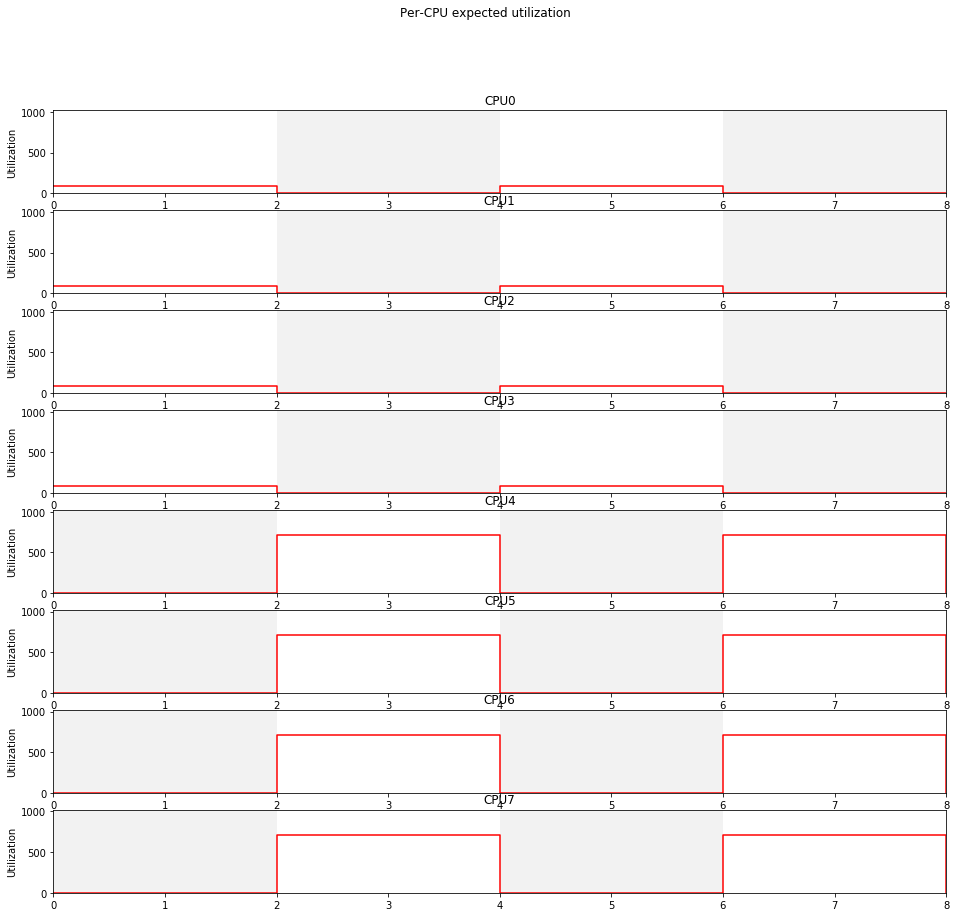

In [12]:
image_path = os.path.join(bundle.res_dir, "expected_placement.png")
Image(image_path)

# Offline replaying

Say someone executed some tests, and ran into some issues. They can create an archive of the results directory and send it your way, and you'll be able to reload it automagically. This also works if you are working on the test code itself, and don't want to re-execute the workload every single time you change the code.

In [13]:
# Let's just reuse what was generated in the previous run
archive_dir = bundle.res_dir

In [14]:
reloaded_bundle = EnergyModelWakeMigration.from_dir(archive_dir)

In [15]:
# Just to prove we're not cheating!
reloaded_bundle == bundle

False

In [16]:
print(reloaded_bundle.test_task_placement())

PASSED: estimated energy=11747.642996651268 bogo-joules, energy threshold=12697.384476751002 bogo-joules
